# Process MASS data structure

In [1]:
import os
import pandas as pd
import numpy as np
import pyedflib
import pickle as pkl
from plotly import express as px
from matplotlib import pyplot as plt

In [2]:
edfpath="D:\SpinCo\MASS\edfs"
annopath="D:\SpinCo\MASS\\annotations"
signalspath="D:\SpinCo\MASS\signals"

## Annotations

In [3]:
allfiles=os.listdir(annopath)
subjectIds=list()
extensions=list()
types=list()
edfFiles=list()
experts=list()
for file in allfiles:
    aux1=file.split(".")
    if aux1[1]=="edf":
        aux2=aux1[0].split(" ")
        if not aux2[1]=="Base":
            aux3=aux2[0].split("-")
            aux4=aux2[1].split("_")

            subjectIds.append(aux3[2])
            extensions.append(aux1[1])
            types.append(aux4[0])
            experts.append(aux4[1])
            edfFiles.append(file)

annoData=pd.DataFrame({
    "subjectId":subjectIds,
    "file":edfFiles,
    "extension":extensions,
    "type":types,
    "expert":experts
})

In [4]:
types=list()
subjectIds=list()
starts=list()
durations=list()
experts=list()
comments=list()

for ind, row in annoData.iterrows():
    fullPath=annopath+"/"+row.file
    signals, signal_headers, header = pyedflib.highlevel.read_edf(fullPath)
    for anno in header['annotations']:
        types.append(row.type)
        subjectIds.append(row.subjectId)
        starts.append(anno[0])
        durations.append(anno[1])
        experts.append(row.expert)
        comments.append(anno[2])

annotations=pd.DataFrame({
    "type":types,
    "subjectId":subjectIds,
    "startTime":starts,
    "duration":durations,
    "expert":experts,
    "comment":comments
})

In [6]:
annotations["labelerId"]=annotations.apply(
    lambda row: "0001" if row.expert=="E1" else "0002"
    ,axis=1)

In [7]:
annotations

,type,subjectId,startTime,duration,expert,comment,labelerId
0,KComplexes,0001,830.838372,0.699174,E1,"<Event channel=""EEG C3-LER"" groupName=""kcomple...",0001
1,KComplexes,0001,841.223012,0.492156,E1,"<Event channel=""EEG C3-LER"" groupName=""kcomple...",0001
2,KComplexes,0001,970.838374,0.578088,E1,"<Event channel=""EEG C3-LER"" groupName=""kcomple...",0001
3,KComplexes,0001,1050.014503,0.695268,E1,"<Event channel=""EEG C3-LER"" groupName=""kcomple...",0001
4,KComplexes,0001,1077.473271,0.648396,E1,"<Event channel=""EEG C3-LER"" groupName=""kcomple...",0001
...,...,...,...,...,...,...,...
45035,Spindles,0019,25434.045319,0.800730,E2,"<Event channel=""EEG C3-LER"" groupName=""spindle...",0002
45036,Spindles,0019,25438.822357,0.472626,E2,"<Event channel=""EEG C3-LER"" groupName=""spindle...",0002
45037,Spindles,0019,25444.489963,1.035090,E2,"<Event channel=""EEG C3-LER"" groupName=""spindle...",0002
45038,Spindles,0019,25457.542096,0.890568,E2,"<Event channel=""EEG C3-LER"" groupName=""spindle...",0002


In [8]:
aux=annotations[["type","expert","subjectId"]].groupby(["type","expert","subjectId"],as_index=False).size()
px.bar(aux,x="subjectId",y="size",color="expert",barmode="group",facet_row="type",title="MASS SS2 annotations overview")

In [36]:
spinData=annotations[annotations.type=="Spindles"].reset_index(drop=True)
spinData.type="spindle"

In [10]:
""" spinData.to_csv(annopath+"\\annotations.csv",index=False) """
#DON'T DO IT, NEED TO REREFERENCE THE STARTTIME

## Signals = Subjects -> SS
we are assuming 1:1 relation signal:subject from now on, so the concepts are merged

In [11]:
allfiles=os.listdir(edfpath)
subjectIds=list()
extensions=list()
types=list()
edfFiles=list()
for file in allfiles:
    aux1=file.split(".")
    if aux1[1]=="edf":
        aux2=aux1[0].split(" ")
        aux3=aux2[0].split("-")
        subjectIds.append(aux3[2])
        extensions.append(aux1[1])
        types.append(aux2[1])
        edfFiles.append(file)

edfsData=pd.DataFrame({
    "subjectId":subjectIds,
    "edfFile":edfFiles,
    "extension":extensions,
    "type":types
})

In [12]:
ssMetadata=edfsData[edfsData.type=="PSG"].reset_index(drop=True)
ssMetadata

,subjectId,edfFile,extension,type
0,0001,01-02-0001 PSG.edf,edf,PSG
1,0002,01-02-0002 PSG.edf,edf,PSG
2,0003,01-02-0003 PSG.edf,edf,PSG
3,0004,01-02-0004 PSG.edf,edf,PSG
4,0005,01-02-0005 PSG.edf,edf,PSG
5,0006,01-02-0006 PSG.edf,edf,PSG
6,0007,01-02-0007 PSG.edf,edf,PSG
7,0008,01-02-0008 PSG.edf,edf,PSG
8,0009,01-02-0009 PSG.edf,edf,PSG
9,0010,01-02-0010 PSG.edf,edf,PSG


In [13]:
#WARNING: harcoded samplerate --------------------------->
hardcodedSamplerate=256
#<--------------------------------------------------------

ssMetadata=edfsData[edfsData.type=="PSG"].reset_index(drop=True)
channels=list()
durations=list()
samplerates=list()
aux=list()
files=list()
for ind, row in ssMetadata.iterrows():
    print("**********************************************")
    print(ind)
    print(row)
    fullPath=edfpath+"/"+row.edfFile
    signals, signal_headers, header = pyedflib.highlevel.read_edf(fullPath)
    for (signal,header) in zip(signals,signal_headers):
        if "C3" in header['label']:
            print(header)
            """ samplerates.append(header['sample_rate']) """
            samplerates.append(hardcodedSamplerate)
            aux.append(header['sample_frequency'])
            channels=header['label'][4:]
            """ durations.append(len(signal)/header['sample_rate']) """
            durations.append(len(signal)/hardcodedSamplerate)
            #pickle the signal
            picklefile="MASS_"+row.subjectId+".pkl"
            files.append(picklefile)
            picklepath=signalspath+"/"+picklefile
            with open(picklepath, 'wb') as file:
                pkl.dump(signal, file)
    print("**********************************************")

""" #check
sum(np.array(samplerates)==np.array(aux))==len(samplerates) """

ssMetadata['file']=files
ssMetadata['channel']=channels
ssMetadata['duration']=durations
ssMetadata['samplerate']=samplerates

**********************************************
0
subjectId                  0001
edfFile      01-02-0001 PSG.edf
extension                   edf
type                        PSG
Name: 0, dtype: object
{'label': 'EEG C3-CLE', 'dimension': 'uV', 'sample_rate': 512.0, 'sample_frequency': 512.0, 'physical_max': 397.0, 'physical_min': -397.0, 'digital_max': 32767, 'digital_min': -32768, 'prefilter': '', 'transducer': ''}
**********************************************
**********************************************
1
subjectId                  0002
edfFile      01-02-0002 PSG.edf
extension                   edf
type                        PSG
Name: 1, dtype: object
{'label': 'EEG C3-CLE', 'dimension': 'uV', 'sample_rate': 512.0, 'sample_frequency': 512.0, 'physical_max': 393.0, 'physical_min': -393.0, 'digital_max': 32767, 'digital_min': -32768, 'prefilter': '', 'transducer': ''}
**********************************************
**********************************************
2
subjectId          

In [14]:
ssMetadata

,subjectId,edfFile,extension,type,file,channel,duration,samplerate
0,0001,01-02-0001 PSG.edf,edf,PSG,MASS_0001.pkl,C3-CLE,28956.0,256
1,0002,01-02-0002 PSG.edf,edf,PSG,MASS_0002.pkl,C3-CLE,35016.0,256
2,0003,01-02-0003 PSG.edf,edf,PSG,MASS_0003.pkl,C3-CLE,36760.0,256
3,0004,01-02-0004 PSG.edf,edf,PSG,MASS_0004.pkl,C3-CLE,28004.0,256
4,0005,01-02-0005 PSG.edf,edf,PSG,MASS_0005.pkl,C3-CLE,31244.0,256
5,0006,01-02-0006 PSG.edf,edf,PSG,MASS_0006.pkl,C3-CLE,28990.0,256
6,0007,01-02-0007 PSG.edf,edf,PSG,MASS_0007.pkl,C3-CLE,28302.0,256
7,0008,01-02-0008 PSG.edf,edf,PSG,MASS_0008.pkl,C3-CLE,26846.0,256
8,0009,01-02-0009 PSG.edf,edf,PSG,MASS_0009.pkl,C3-CLE,29834.0,256
9,0010,01-02-0010 PSG.edf,edf,PSG,MASS_0010.pkl,C3-CLE,25930.0,256


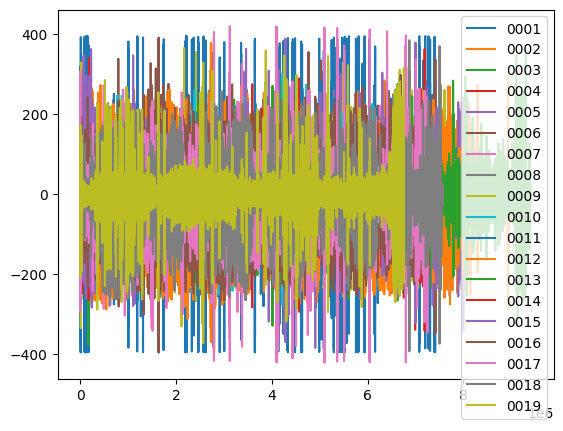

In [15]:
leg=list()
for ind, row in ssMetadata.iterrows():
    path=signalspath+"/"+row.file
    cFile = open(path, 'rb')
    signal = pkl.load(cFile)
    cFile.close()
    leg.append(row.subjectId)
    plt.plot(signal)
plt.legend(leg,loc='upper right')
plt.show()

In [16]:
ssMetadata[["subjectId","file","channel","duration","samplerate"]].to_csv(signalspath+"/signalsMetadata.csv",index=False)